Original image:



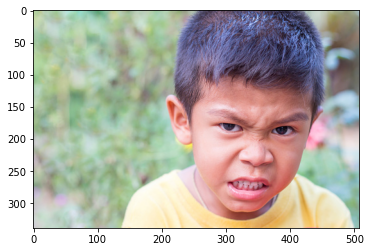



Resized image:



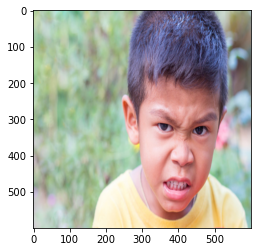



Grayscale image:



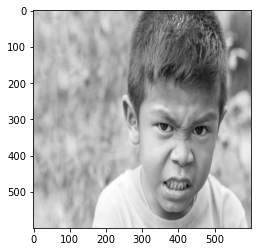



Smoothened grayscale image:



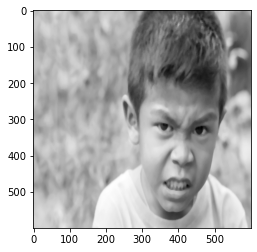



Edges retrieved image:



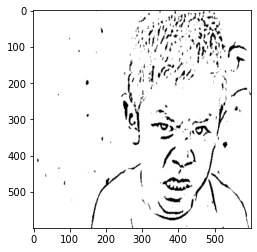



Mask image:



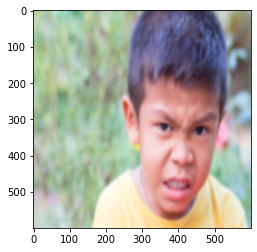

Final output image with cartoon effect:



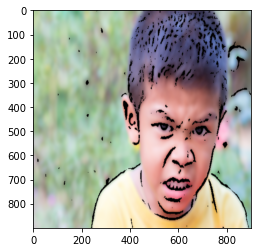

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\sobik\anaconda3\lib\tkinter\__init__.py", line 1883, in __call__
    return self.func(*args)
  File "<ipython-input-9-533f1c2970a8>", line 95, in <lambda>
    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
  File "<ipython-input-9-533f1c2970a8>", line 110, in save
    tk.messagebox.showinfo(title=None, message=I)
AttributeError: module 'tkinter' has no attribute 'messagebox'


In [9]:
import cv2 #for image processing
import easygui #to open the filebox
import numpy as np #to store image
import imageio #to read image stored at particular path

import sys
import matplotlib.pyplot as plt
import os
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

top=tk.Tk()
top.geometry('400x400')
top.title('Cartoonify Your Image !')
top.configure(background='white')
label=Label(top,background='#CDCDCD', font=('calibri',20,'bold'))

def upload():
    ImagePath=easygui.fileopenbox()
    cartoonify(ImagePath)

def cartoonify(ImagePath):
    # read the image
    originalmage = cv2.imread(ImagePath)
    originalmage = cv2.cvtColor(originalmage, cv2.COLOR_BGR2RGB)
    print("Original image:\n")
    plt.imshow(originalmage, cmap='gray')
    plt.show()
    #print(image)  # image is stored in form of numbers

    # confirm that image is chosen
    if originalmage is None:
        print("Can not find any image. Choose appropriate file")
        sys.exit()
    
    
    #resized image
    ReSized1 = cv2.resize(originalmage, (600, 600))
    print("\n\nResized image:\n")
    plt.imshow(ReSized1, cmap='gray')
    plt.show()
    
    
    #converting an image to grayscale
    grayScaleImage= cv2.cvtColor(originalmage, cv2.COLOR_BGR2GRAY)
    ReSized2 = cv2.resize(grayScaleImage, (600, 600))
    print("\n\nGrayscale image:\n")
    plt.imshow(ReSized2, cmap='gray')
    plt.show()
    
    
    #applying median blur to smoothen an image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)
    ReSized3 = cv2.resize(smoothGrayScale, (600, 600))
    print("\n\nSmoothened grayscale image:\n")
    plt.imshow(ReSized3, cmap='gray')
    plt.show()

    
    #retrieving the edges for cartoon effect
    #by using thresholding technique
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 9)
    ReSized4 = cv2.resize(getEdge, (600, 600))
    print("\n\nEdges retrieved image:\n")
    plt.imshow(ReSized4, cmap='gray')
    plt.show()
    
    
    #applying bilateral filter to remove noise 
    #and keep edge sharp as required
    colorImage = cv2.bilateralFilter(originalmage, 9, 300, 300)
    ReSized5 = cv2.resize(colorImage, (600, 600))
    print("\n\nMask image:\n")
    plt.imshow(ReSized5, cmap='gray')
    plt.show()

    
    #masking edged image with our "BEAUTIFY" image
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)
    ReSized6 = cv2.resize(cartoonImage, (900, 900))
    print("Final output image with cartoon effect:\n")
    plt.imshow(ReSized6, cmap='gray')
    plt.show()

    #Plotting the whole transition
    #images=[ReSized1, ReSized2, ReSized3, ReSized4, ReSized5, ReSized6]
    #fig, axes = plt.subplots(3,2, figsize=(8,8), subplot_kw={'xticks':[], 'yticks':[]}, 
    #                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
    #print("Plotting whole transition together\n")
    #for i, ax in enumerate(axes.flat):
    #    ax.imshow(images[i], cmap='gray')

    save1=Button(top,text="Save cartoon image",command=lambda: save(ReSized6, ImagePath),padx=30,pady=5)
    save1.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
    save1.pack(side=TOP,pady=50)
    
    plt.show()
    
    
def save(ReSized6, ImagePath):
    #saving an image using imwrite()
    newName="cartoonified_Image"
    path1 = os.path.dirname(ImagePath)
    extension=os.path.splitext(ImagePath)[1]
    path = os.path.join(path1, newName+extension)
    cv2.imwrite(path, cv2.cvtColor(ReSized6, cv2.COLOR_RGB2BGR))
    I= "Image saved by name " + newName +" at "+ path
    tk.messagebox.showinfo(title=None, message=I)

upload=Button(top,text="Cartoonify an Image",command=upload,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('calibri',10,'bold'))
upload.pack(side=TOP,pady=50)

top.mainloop()